# E-Commerce Analytics

The given data set is the e-commerce transactional data for 4348 customers that contains the date-time of sale, customer shipping location, and price of single unit from 2016 to 2017.
The data records 5,37,979  transactions. The data set has the following variables:

1.  Customer ID:This is the unique identifier for each Customer 
2. Item Code:This is the Unique ID for each product
3. Invoice No: This is the Unique ID for each purchase
4. Date of purchase:Date on which the purchase was made
5. Quantity: Number of items bought for each product
6. Time:Time at which the purchase was made. The time is in IST time zone.
7. Price per Unit: Price of single unit of item purchased
8. Price: Total purchase price
9. Cancelled Status:This is the location of the warehouse from where the product was shipped
10.Shipping Location:The Status of Cancellation (True/False)
11.Reason of Return: Reason for the return of products
12.Sold as set:It states whether the product was sold with another product/ Offer or not


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.cluster import KMeans

In [9]:
# Loading the data file
data = pd.read_excel("E-com_Data.xlsx")

### Missing Value Treatment

In [10]:
# Treating Missing Values
data.isnull().sum(axis = 0)

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

Variables Missing Values  % of data Missing 


Customer ID                25%             

Cancelled Status           80%

Reason of return           99.9%

Sold as set                99.9%


In [11]:
# Drop the rows in Cloumns Customer ID where the values are missing
data = data[pd.notnull(data["CustomerID"])]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          404189 non-null  object        
 2   InvoieNo           404189 non-null  int64         
 3   Date of purchase   404189 non-null  datetime64[ns]
 4   Quantity           404189 non-null  int64         
 5   Time               404189 non-null  object        
 6   price per Unit     404189 non-null  float64       
 7   Price              404189 non-null  float64       
 8   Shipping Location  404189 non-null  object        
 9   Cancelled_status   8183 non-null    float64       
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 40.1+ MB


In [13]:
# Dropping the column Item code, Reason of return , sold as set
data = data.drop(["Item Code", "Reason of return", "Sold as set"],
                axis = 1)

In [14]:
data.isnull().sum(axis = 0)

CustomerID                0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     396006
dtype: int64

In [15]:
# Missing Value Treatment : Cancelled Status - Replacing With False
data["Cancelled_status"].fillna(value = False, axis = 0,
                               inplace = True)

In [16]:
data_copy = data.copy()
data_copy.reset_index(inplace = True).drop(["index"],axis = 1)
data.reset_index(inplace= True).drop(["index"],axis = 1)
# data_copy.reset_index(inplace = True)
# data.drop(["index"], axis = 1)

AttributeError: 'NoneType' object has no attribute 'drop'

### Exploratory Data Analysis

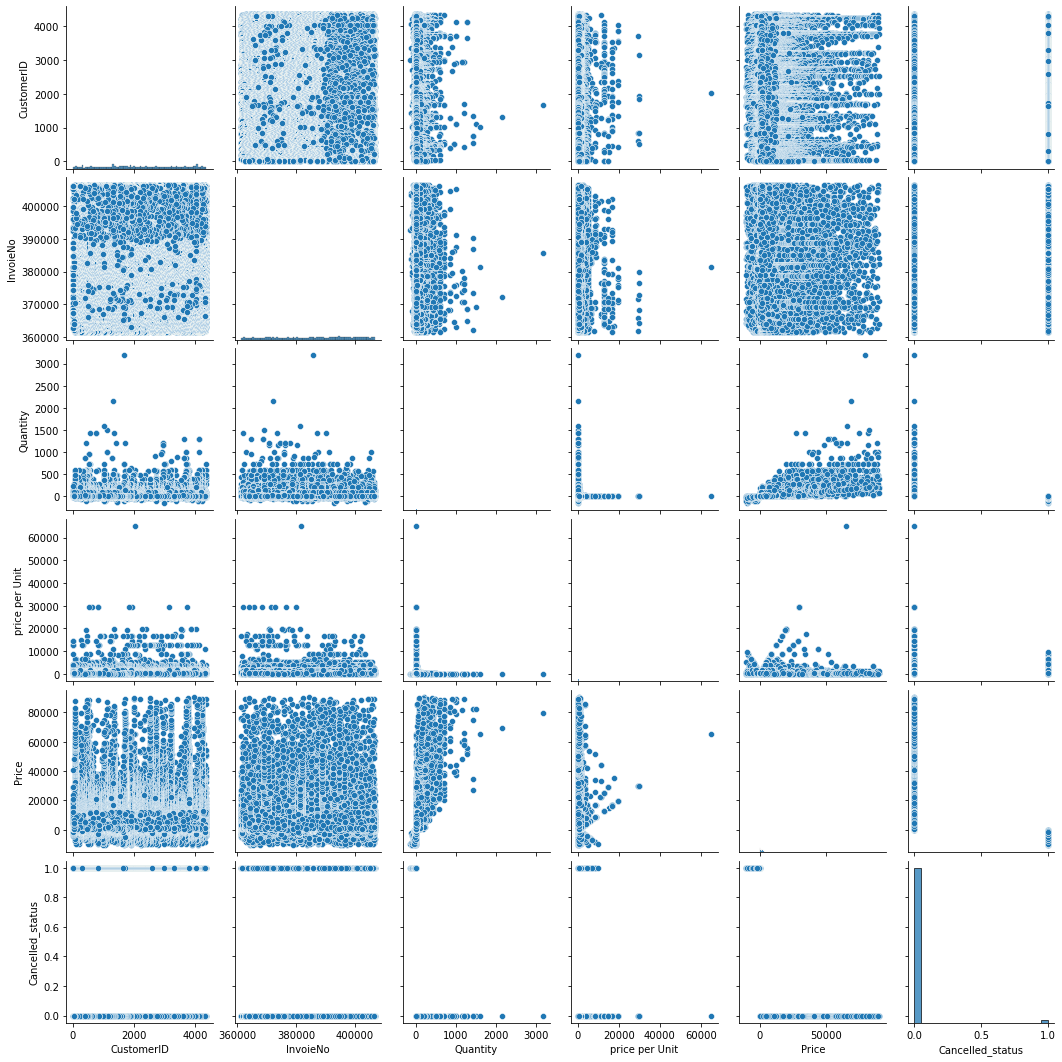

In [17]:
# Seaborn Visualization Library
import seaborn as sns 
# Create the defalut pair plot 
sns.pairplot(data)

### Label  Encoding 

In [18]:
# Label encoding for Cancelled Status(Fales = 0, True = 1)
data["Cancelled_status"] = data["Cancelled_status"].astype("category")
data["Cancelled_status"] = data["Cancelled_status"].cat.codes

data["Shipping Location"] = data["Shipping Location"].astype("category")
data["Shipping Location"] = data["Shipping Location"].cat.codes

In [19]:
data.head()

,CustomerID,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
0,4355.0,398177,2017-10-29,6,15:36:00,321.0,1926.0,0,0
1,4352.0,394422,2017-10-05,2,14:53:00,870.0,1740.0,0,0
2,4352.0,394422,2017-10-12,2,14:53:00,933.0,1866.0,0,0
3,4352.0,388633,2017-08-22,3,14:47:00,623.0,1869.0,0,0
4,4352.0,394422,2017-10-10,2,14:53:00,944.0,1888.0,0,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   InvoieNo           404189 non-null  int64         
 2   Date of purchase   404189 non-null  datetime64[ns]
 3   Quantity           404189 non-null  int64         
 4   Time               404189 non-null  object        
 5   price per Unit     404189 non-null  float64       
 6   Price              404189 non-null  float64       
 7   Shipping Location  404189 non-null  int8          
 8   Cancelled_status   404189 non-null  int8          
dtypes: datetime64[ns](1), float64(3), int64(2), int8(2), object(1)
memory usage: 25.4+ MB


### Feature Engineering

In [21]:
# Extracting Hours from Time Stamp
data["Time"] = pd.to_datetime(data["Time"],
                             format = "%H:%M:%S")
data["Time"] = data["Time"].dt.hour

In [22]:
# Extracting Day , Month , and Year from date
data["Date"] = data["Date of purchase"]
data['Date of purchase'] = data["Date"].dt.day

In [23]:
data["Month of purchase"] = data["Date"].dt.month
data["Year of purchase"] = data["Date"].dt.year


In [24]:
data.head()

,CustomerID,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Date,Month of purchase,Year of purchase
0,4355.0,398177,29,6,15,321.0,1926.0,0,0,2017-10-29,10,2017
1,4352.0,394422,5,2,14,870.0,1740.0,0,0,2017-10-05,10,2017
2,4352.0,394422,12,2,14,933.0,1866.0,0,0,2017-10-12,10,2017
3,4352.0,388633,22,3,14,623.0,1869.0,0,0,2017-08-22,8,2017
4,4352.0,394422,10,2,14,944.0,1888.0,0,0,2017-10-10,10,2017


In [25]:
data.drop(["Date"], axis = 1, inplace = True)

In [26]:
import datetime as dt 
Latest_Date = dt.datetime(2018,1,1)


In [27]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404189 entries, 0 to 404188
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              404189 non-null  int64         
 1   CustomerID         404189 non-null  float64       
 2   InvoieNo           404189 non-null  int64         
 3   Date of purchase   404189 non-null  datetime64[ns]
 4   Quantity           404189 non-null  int64         
 5   Time               404189 non-null  object        
 6   price per Unit     404189 non-null  float64       
 7   Price              404189 non-null  float64       
 8   Shipping Location  404189 non-null  object        
 9   Cancelled_status   404189 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 30.8+ MB


In [28]:
# Create RFM Modeling Scores for each Customer 
RFMScores = data_copy.groupby("CustomerID").agg({"Date of purchase": lambda x : (Latest_Date - x.max()).days,
                                                "InvoieNo":lambda x: len(x), 
                                                "Price":lambda x : x.sum()})

# Convert Invoice date into type int 
RFMScores["Date of purchase"] = RFMScores["Date of purchase"].astype(int)

# Rename Column names to Recency , Frequency, and Monetary
RFMScores.rename(columns = {"Date of purchase":"Recency",
                           "InvoieNo":"Frequency",
                           "Price":"Monetary"}, inplace = True)

RFMScores.reset_index().head()



,CustomerID,Recency,Frequency,Monetary
0,2.0,16,182,553704.0
1,3.0,89,27,257404.0
2,4.0,31,72,176613.0
3,5.0,323,16,41976.0
4,6.0,49,84,151822.0


In [29]:
# Split into four segements using quantiles
quantiles = RFMScores.quantile(q = [0.25, 0.5,0.75])
quantiles = quantiles.to_dict()

In [30]:
quantiles

{'Recency': {0.25: 30.0, 0.5: 63.0, 0.75: 156.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [31]:
# Functions to create R, F and M segements 
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3 
    else: 
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else : 
        return 1

In [32]:
# Calculate and Add R, F, and M segement value Columns in the existing
# Dataset
RFMScores["R"] = RFMScores["Recency"].apply(RScoring , 
                                            args = ('Recency',quantiles))
RFMScores["F"] = RFMScores["Frequency"].apply(FnMScoring,
                                             args = ("Frequency",quantiles))
RFMScores["M"] = RFMScores["Monetary"].apply(FnMScoring,
                                            args = ("Monetary",quantiles))

RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,16,182,553704.0,1,1,1
3.0,89,27,257404.0,3,3,1
4.0,31,72,176613.0,2,2,2
5.0,323,16,41976.0,4,4,3
6.0,49,84,151822.0,2,2,2


In [33]:
# Calculate and Add RFMGroup Value Column showing Combined Concatenated Score of RFM
RFMScores["RFMGroup"] = RFMScores.R.map(str)+ RFMScores.F.map(str)+RFMScores.M.map(str)

# Calculate and Add RFM Score Value column showing total sum of RFMGroup
RFMScores["RFMScore"] = RFMScores[["R","F","M"]].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,16,182,553704.0,1,1,1,111,3
3.0,89,27,257404.0,3,3,1,331,7
4.0,31,72,176613.0,2,2,2,222,6
5.0,323,16,41976.0,4,4,3,443,11
6.0,49,84,151822.0,2,2,2,222,6


In [34]:
RFMScores.reset_index(inplace = True)

## Model 1 - KMeans (Standardisation of data)

In [35]:
# Standardising the data
from sklearn.preprocessing import StandardScaler

# Bring the data on the same scale
scaleobj = StandardScaler()

Scaled_Data = scaleobj.fit_transform(data)

# Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = data.index,
                          columns = data.columns)

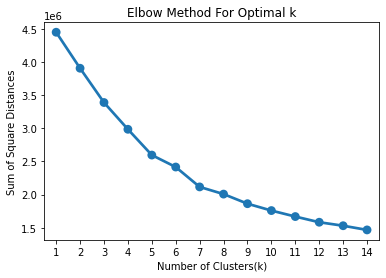

In [36]:
from sklearn.cluster import KMeans
import seaborn as sns 
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters = k, init = "k-means++", max_iter = 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
    
import matplotlib.pyplot as plt 
# Plot the graph for the sum of square distance values and Number of clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method For Optimal k")
plt.show()

In [37]:
model = KMeans(n_clusters = 5)
clusters = model.fit_predict(Scaled_Data)
Scaled_Data["Cluster"] = clusters
data["Cluster"] = clusters

<ipython-input-38-0a980b130457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop_duplicates(["CustomerID"], inplace = True)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

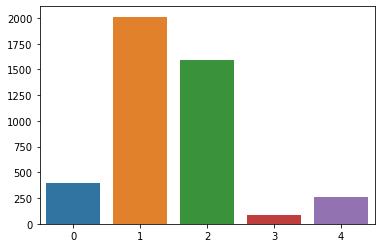

In [38]:
new_data = data[["CustomerID", "Cluster"]]
new_data.drop_duplicates(["CustomerID"], inplace = True)
new_data.reset_index(inplace = True)
new_data.drop(["index"], axis = 1, inplace= True)
sns.barplot(x = np.arange(0,5,1), y = list(new_data.groupby(["Cluster"]).count()["CustomerID"]))

In [39]:
# Now Print the silhouette score of this model
from sklearn.metrics import silhouette_score
print(silhouette_score(Scaled_Data, model.labels_, metric = "euclidean"))

0.26527220694212


## Model 2: PCA + KMeans

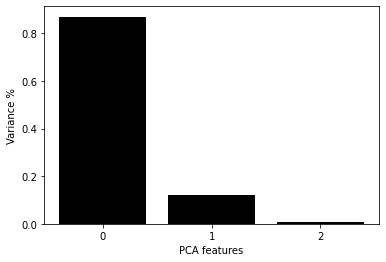

In [40]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = "black")
plt.xlabel("PCA features")
plt.ylabel("Variance %")
plt.xticks(features)


PCA_components = pd.DataFrame(principalComponents)
PCA_components = PCA_components.iloc[:,:2]
df = PCA_components

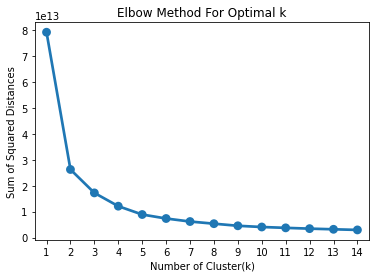

In [41]:
from sklearn.cluster import KMeans
import seaborn as sns 
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters = k, init = "k-means++", max_iter = 1000)
    km = km.fit(df)
    sum_of_sq_dist[k] = km.inertia_
    
import matplotlib.pyplot as plt

# Plot the graph for the sum of square distances values and number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()),
              y = list(sum_of_sq_dist.values()))
plt.xlabel("Number of Cluster(k)")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method For Optimal k")
plt.show()

In [42]:
model = KMeans(n_clusters=3)
clusters = model.fit_predict(df)
df["Cluster"] = clusters
data_copy["Cluster"] = clusters

In [43]:
df.head()

,0,1,Cluster
0,-12533.786748,-455.315924,0
1,-8780.195108,-674.800218,0
2,-8778.865938,-548.374285,0
3,-2990.485972,-605.355357,2
4,-8778.633898,-526.299974,0


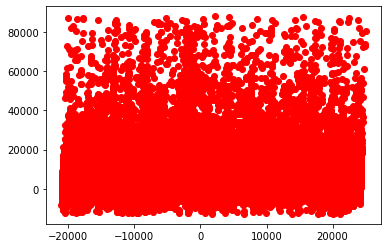

In [44]:
plt.scatter(df[[0]] , df[[1]] , color = 'red')

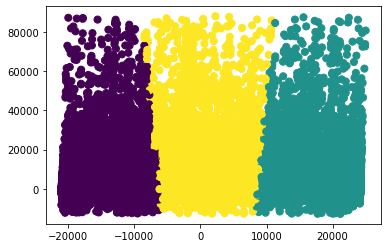

In [45]:
plt.scatter(df[[0]], df[[1]], c= clusters, s=50, cmap='viridis')


In [69]:
# Now , print the silhouette score of this model
from sklearn.metrics import silhouette_score
print(silhouette_score(df, model.labels_, metric = "euclidean"))

0.5192502543853343


In [47]:
data_copy

,index,CustomerID,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Cluster
0,0,4355.0,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,False,0
1,1,4352.0,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,False,0
2,2,4352.0,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,False,0
3,3,4352.0,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,False,2
4,4,4352.0,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,False,0
...,...,...,...,...,...,...,...,...,...,...,...
404184,537945,37.0,402292,2017-11-28,1,12:07:00,384.0,384.0,Location 8,False,0
404185,537946,37.0,402292,2017-11-27,1,12:07:00,398.0,398.0,Location 8,False,0
404186,537947,21.0,363890,2016-12-21,8,12:58:00,308.0,2464.0,Location 8,False,1
404187,537948,21.0,363890,2016-12-21,36,12:58:00,113.0,4068.0,Location 8,False,1


In [48]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404189 entries, 0 to 404188
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              404189 non-null  int64         
 1   CustomerID         404189 non-null  float64       
 2   InvoieNo           404189 non-null  int64         
 3   Date of purchase   404189 non-null  datetime64[ns]
 4   Quantity           404189 non-null  int64         
 5   Time               404189 non-null  object        
 6   price per Unit     404189 non-null  float64       
 7   Price              404189 non-null  float64       
 8   Shipping Location  404189 non-null  object        
 9   Cancelled_status   404189 non-null  object        
 10  Cluster            404189 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(3), object(3)
memory usage: 32.4+ MB


In [49]:
#Append the RFM values back into original data set
# defining the dictionary to Map customer ID with Label
new_dict = {}
for i in range(len(RFMScores.CustomerID)):
    new_dict[RFMScores["CustomerID"][i]] = RFMScores["Recency"][i] 
    
 
data_copy["Recency"] = [new_dict[i] for i in data_copy.CustomerID]

In [50]:
new_dict = {}
for i in range(len(RFMScores.CustomerID)):
    new_dict[RFMScores["CustomerID"][i]] = RFMScores["Frequency"][i] 
    
 
data_copy["Frequency"] = [new_dict[i] for i in data_copy.CustomerID]

In [51]:
new_dict = {}
for i in range(len(RFMScores.CustomerID)):
    new_dict[RFMScores["CustomerID"][i]] = RFMScores["Monetary"][i] 
    
 
data_copy["Monetary"] = [new_dict[i] for i in data_copy.CustomerID]

In [52]:
new_dict = {}
for i in range(len(RFMScores.CustomerID)):
    new_dict[RFMScores["CustomerID"][i]] = RFMScores["RFMScore"][i] 
    
 
data_copy["RFMScore"] = [new_dict[i] for i in data_copy.CustomerID]

In [62]:
new_dict = {}
for i in range(len(RFMScores.CustomerID)):
    new_dict[RFMScores["CustomerID"][i]] = RFMScores["R"][i] 
    
 
data_copy["R"] = [new_dict[i] for i in data_copy.CustomerID]

In [64]:
new_dict = {}
for i in range(len(RFMScores.CustomerID)):
    new_dict[RFMScores["CustomerID"][i]] = RFMScores["F"][i] 
    
 
data_copy["F"] = [new_dict[i] for i in data_copy.CustomerID]

In [65]:
new_dict = {}
for i in range(len(RFMScores.CustomerID)):
    new_dict[RFMScores["CustomerID"][i]] = RFMScores["M"][i] 
    
 
data_copy["M"] = [new_dict[i] for i in data_copy.CustomerID]

In [53]:
data_copy.head()

,index,CustomerID,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Cluster,Recency,Frequency,Monetary,RFMScore
0,0,4355.0,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,False,0,56,21,39209.0,8
1,1,4352.0,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,False,0,52,122,277997.0,4
2,2,4352.0,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,False,0,52,122,277997.0,4
3,3,4352.0,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,False,2,52,122,277997.0,4
4,4,4352.0,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,False,0,52,122,277997.0,4


### Cluster Behaviour Analysis

In [54]:
# look at the centroids per cluster
centroid_df = data_copy.groupby('Cluster')[['Recency', 'Frequency', 'Monetary','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary':'mean','CustomerID':'nunique'}).reset_index()
centroid_df = centroid_df.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df

,Cluster,Recency,Frequency,Monetary,NumBuyers
0,0,31.794582,774.112795,1.343823e+06,2850
1,1,79.982757,549.592998,1.273321e+06,2500
2,2,53.311796,665.810191,1.502843e+06,2509


<ipython-input-55-d144bce3775c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop_duplicates(["CustomerID"], inplace = True)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

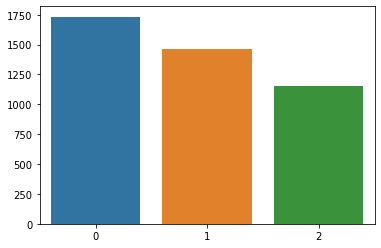

In [55]:
new_data = data_copy[["CustomerID", "Cluster"]]
new_data.drop_duplicates(["CustomerID"], inplace = True)
new_data.reset_index(inplace = True)
new_data.drop(["index"], axis = 1, inplace= True)
sns.barplot(x = np.arange(0,3,1), y = list(new_data.groupby(["Cluster"]).count()["CustomerID"]))

In [67]:
data_copy.to_csv("RFM_Analysis_Output")

In [68]:
data_copy.to_csv('RFM_Analysis_Output.csv', index=False)